**Set up the Environment**

In [2]:
from bluesky import RunEngine
RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

from ophyd.sim import motor1,motor2, Syn2DGauss, SynGauss
from bluesky.plans import scan, adaptive_scan, grid_scan
import numpy as np
s = np.random.RandomState(0)


**A Simple 1D Scan**

In [3]:
#Lets define a simulated detector https://github.com/bluesky/ophyd/blob/7937cd46e92e9ec2f7eec321dd5b1b1b71115e20/ophyd/sim.py#L475
from ophyd.sim import det, motor

my_det = SynGauss('my_det', motor, 'motor', center=0, Imax=1, sigma=1,noise_multiplier=0.1)



Transient Scan ID: 1     Time: 2021-06-02 16:09:07
Persistent Unique Scan ID: '0b400e08-d91e-4397-a754-91cbbe944f3b'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |     my_det |
+-----------+------------+------------+------------+
|         1 | 16:09:07.5 |    -15.000 |      0.000 |
|         2 | 16:09:07.7 |    -14.747 |      0.000 |
|         3 | 16:09:07.7 |    -14.495 |      0.000 |
|         4 | 16:09:07.7 |    -14.242 |      0.000 |
|         5 | 16:09:07.8 |    -13.990 |      0.000 |
|         6 | 16:09:07.8 |    -13.737 |      0.000 |
|         7 | 16:09:07.9 |    -13.485 |      0.000 |
|         8 | 16:09:07.9 |    -13.232 |      0.000 |
|         9 | 16:09:07.9 |    -12.980 |      0.000 |
|        10 | 16:09:08.0 |    -12.727 |      0.000 |
|        11 | 16:09:08.0 |    -12.475 |      0.000 |
|        12 | 16:09:08.1 |    -12.222 |      0.000 |
|        13 | 16:09:08.1 |    -11.970 |      0.000 |
|        14

('0b400e08-d91e-4397-a754-91cbbe944f3b',)

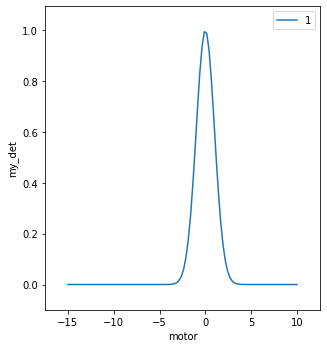

In [4]:
# Now we can perform a scan and see the result

RE(scan([my_det],motor, -15,10,100))



**1D Adaptive Scan**



Transient Scan ID: 2     Time: 2021-06-02 16:09:14
Persistent Unique Scan ID: '17ef7187-3c1a-4878-8a1f-9bd059c19fe6'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |     my_det |
+-----------+------------+------------+------------+
|         1 | 16:09:14.7 |    -15.000 |      0.000 |
|         2 | 16:09:14.7 |    -12.505 |      0.000 |
|         3 | 16:09:14.8 |     -9.509 |      0.000 |
|         4 | 16:09:14.8 |     -6.112 |      0.000 |
|         5 | 16:09:14.9 |     -2.395 |      0.057 |
|         6 | 16:09:14.9 |      1.233 |      0.468 |
|         7 | 16:09:15.0 |     -1.953 |      0.148 |
|         8 | 16:09:15.0 |     -2.154 |      0.098 |
|         9 | 16:09:15.0 |     -1.903 |      0.164 |
|        10 | 16:09:15.1 |     -1.961 |      0.146 |
|        11 | 16:09:15.1 |     -1.767 |      0.210 |
|        12 | 16:09:15.1 |     -1.809 |      0.195 |
|        13 | 16:09:15.2 |     -1.656 |      0.254 |
|        14

('17ef7187-3c1a-4878-8a1f-9bd059c19fe6',)

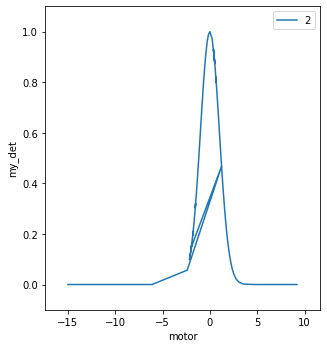

In [5]:
#https://nsls-ii.github.io/bluesky/plans.html#adaptive-scans
RE(adaptive_scan([my_det], 'my_det', motor,
                 start=-15.0,
                 stop=10.0,
                 min_step=0.01,
                 max_step=5,
                 target_delta=.05,
                 backstep=True))

# A small bug means that the start and stop values must be floats (15.0 rather than 15) otherwise the table doesn't plot correctly

**2D Scan**

In [50]:
import numpy as np
s = np.random.RandomState(0)
det_2D = Syn2DGauss('det_2D', motor1, 'motor1', motor2, 'motor2',
                               center=(0, 0), Imax=1, noise='uniform',
                               sigma=1, noise_multiplier=0.1, random_state=s)



Transient Scan ID: 27     Time: 2021-06-02 14:24:24
Persistent Unique Scan ID: 'e9362a7d-9555-4ee1-8625-a1dede8db45d'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |     motor2 |     det_2D |
+-----------+------------+------------+------------+------------+
|         1 | 14:24:25.0 |     -2.000 |     -2.000 |     -0.028 |
|         2 | 14:24:25.0 |     -2.000 |     -1.556 |      0.087 |
|         3 | 14:24:25.1 |     -2.000 |     -1.111 |      0.165 |
|         4 | 14:24:25.1 |     -2.000 |     -0.667 |      0.058 |
|         5 | 14:24:25.2 |     -2.000 |     -0.222 |      0.147 |
|         6 | 14:24:25.2 |     -2.000 |      0.222 |      0.150 |
|         7 | 14:24:25.3 |     -2.000 |      0.667 |      0.123 |
|         8 | 14:24:25.3 |     -2.000 |      1.111 |      0.018 |
|         9 | 14:24:25.4 |     -2.000 |      1.556 |      0.131 |
|        10 | 14:24:25.4 |     -2.000 |      2.000 |      0.008 |


('e9362a7d-9555-4ee1-8625-a1dede8db45d',)

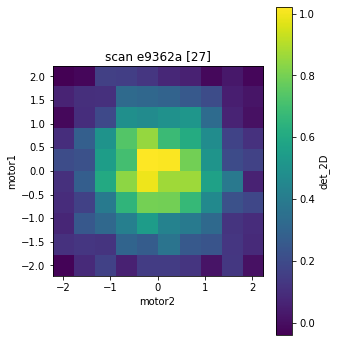

In [52]:
RE(grid_scan([det_2D],
             motor1, -2, 2, 10,  
             motor2, -2, 2, 10))
